# Machine Learning Basics
In this module, you'll be implementing a simple Linear Regressor and Logistic Regressor. Obtain salary data using `wget` from [here](https://raw.githubusercontent.com/solarillion/MLBasics/master/Data/Salary_Data.csv). <br> <br>
**Pipeline:**
* Acquiring the data - done
* Handling files and formats - done
* Data Analysis - done
* Prediction
* Analysing results

## Imports
You may require NumPy, pandas, matplotlib and scikit-learn for this module. Do not, however, use the inbuilt Linear and Logistic Regressors from scikit-learn.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import random
from sklearn.model_selection import train_test_split

## Dataset
You can load the dataset and perform any dataset related operations here. Split the data into training and testing sets. Do this separately for the regression and classification problems.

In [13]:
data=pd.read_csv("C:/Users/91950/Desktop/MLBasics-master/MLBasics-master/Data/Salary_Data.csv")
data
train, test = sklearn.model_selection.train_test_split(data, train_size = 0.5)
print(train)
print(test)

    YearsExperience    Salary
12              4.0   56957.0
1               1.3   46205.0
6               3.0   60150.0
28             10.3  122391.0
5               2.9   56642.0
25              9.0  105582.0
21              7.1   98273.0
20              6.8   91738.0
18              5.9   81363.0
23              8.2  113812.0
4               2.2   39891.0
8               3.2   64445.0
27              9.6  112635.0
11              4.0   55794.0
10              3.9   63218.0
    YearsExperience    Salary
14              4.5   61111.0
29             10.5  121872.0
15              4.9   67938.0
19              6.0   93940.0
24              8.7  109431.0
3               2.0   43525.0
16              5.1   66029.0
17              5.3   83088.0
2               1.5   37731.0
7               3.2   54445.0
22              7.9  101302.0
9               3.7   57189.0
26              9.5  116969.0
13              4.1   57081.0
0               1.1   39343.0


## Task 1a - Linear Regressor
Code your own Linear Regressor here, and fit it to your training data. You will be predicting salary based on years of experience.

In [14]:
def linear_regressor(df):
    n=len(df)
    X=df['YearsExperience']
    Y=df['Salary']
    x=list(X)
    y=list(Y)
    x_mean=round(sum(x)/n, 3)
    y_mean=round(sum(y)/n, 3)
    print(x_mean, y_mean)

    num=0
    den=0
    for i in range(n):
        num+= (x[i]-x_mean)*(y[i]-y_mean)
        den+= (x[i]-x_mean)**2
    m= round(num/den, 3)
    c= round(y_mean-(m*x_mean), 3)
    print(m,c)

    yp=[]
    for i in range (n):
        y_pred= m*x[i] + c
        y_pred=round(y_pred, 3)
        yp.append(y_pred)
    df['EstimatedSalary']=np.array(yp)
    print(df)

linear_regressor(train)



5.427 77939.733
9174.786 28148.169
    YearsExperience    Salary  EstimatedSalary
12              4.0   56957.0        64847.313
1               1.3   46205.0        40075.391
6               3.0   60150.0        55672.527
28             10.3  122391.0       122648.465
5               2.9   56642.0        54755.048
25              9.0  105582.0       110721.243
21              7.1   98273.0        93289.150
20              6.8   91738.0        90536.714
18              5.9   81363.0        82279.406
23              8.2  113812.0       103381.414
4               2.2   39891.0        48332.698
8               3.2   64445.0        57507.484
27              9.6  112635.0       116226.115
11              4.0   55794.0        64847.313
10              3.9   63218.0        63929.834


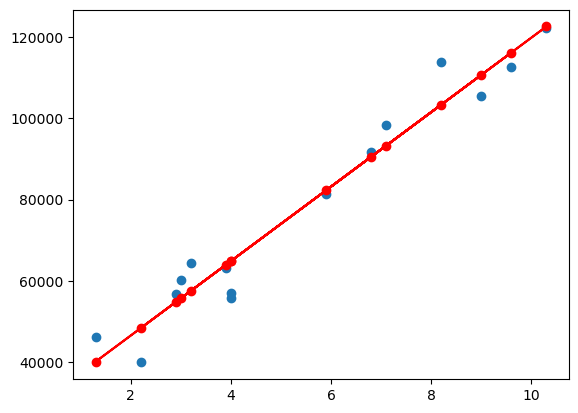

In [15]:
plt.scatter(train['YearsExperience'], train['Salary'])
plt.scatter(train['YearsExperience'], train['EstimatedSalary'], color='red')
plt.plot(train['YearsExperience'], train['EstimatedSalary'], color='red')
plt.show()

## Task 1b - Logistic Regression
Code your own Logistic Regressor here, and fit it to your training data. You will first have to create a column, 'Salary<60000', which contains '1' if salary is less than 60000 and '0' otherwise. This is your target variable, which you will aim to predict based on years of experience.

In [16]:
data=pd.read_csv("C:/Users/91950/Desktop/MLBasics-master/MLBasics-master/Data/Salary_Data.csv")
train_log, test_log = sklearn.model_selection.train_test_split(data, train_size = 0.5)
print(train_log)
print(test_log)

    YearsExperience    Salary
15              4.9   67938.0
23              8.2  113812.0
17              5.3   83088.0
4               2.2   39891.0
12              4.0   56957.0
26              9.5  116969.0
28             10.3  122391.0
24              8.7  109431.0
5               2.9   56642.0
2               1.5   37731.0
6               3.0   60150.0
9               3.7   57189.0
22              7.9  101302.0
21              7.1   98273.0
20              6.8   91738.0
    YearsExperience    Salary
16              5.1   66029.0
3               2.0   43525.0
27              9.6  112635.0
25              9.0  105582.0
1               1.3   46205.0
11              4.0   55794.0
13              4.1   57081.0
8               3.2   64445.0
19              6.0   93940.0
0               1.1   39343.0
14              4.5   61111.0
18              5.9   81363.0
29             10.5  121872.0
7               3.2   54445.0
10              3.9   63218.0


    YearsExperience    Salary  Salary<60000
15              4.9   67938.0             0
23              8.2  113812.0             0
17              5.3   83088.0             0
4               2.2   39891.0             1
12              4.0   56957.0             1
26              9.5  116969.0             0
28             10.3  122391.0             0
24              8.7  109431.0             0
5               2.9   56642.0             1
2               1.5   37731.0             1
6               3.0   60150.0             0
9               3.7   57189.0             1
22              7.9  101302.0             0
21              7.1   98273.0             0
20              6.8   91738.0             0
    YearsExperience    Salary  Salary<60000
16              5.1   66029.0             0
3               2.0   43525.0             1
27              9.6  112635.0             0
25              9.0  105582.0             0
1               1.3   46205.0             1
11              4.0   55794.0   

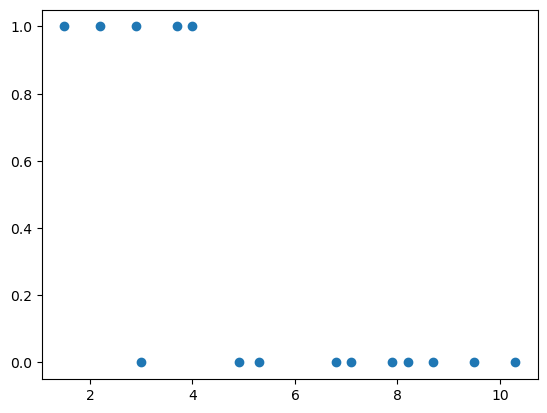

In [17]:
def split_df(df):
    
    s=[]
    for x in df['Salary']:
        if x<60000:
            s.append(1)
        else:
            s.append(0)
    df['Salary<60000']=s
    print(df)
split_df(train_log)
split_df(test_log)

plt.scatter(train_log['YearsExperience'], train_log['Salary<60000'])
plt.show()

In [18]:
X=np.array(train_log['YearsExperience']) #X is 15x1
Y=np.array(train_log['Salary<60000']) #Y is 15x1

In [19]:
class Logistic_Regression():
    def init(self, lr, itr):
        self.lr=lr
        self.itr=itr
        
    def fit(self, X, Y):
        self.m=len(X)
        self.X=X
        self.Y=Y
        self.w=np.zeros(self.m) #w is 15x1
        self.b=0
        
        for i in range(self.itr):
            yp= 1/ (1+np.exp(-(self.X.dot(self.w)+self.b)))
            dw= (1/self.m)*np.dot(self.X.T, (yp-self.Y))
            db=(1/self.m)*np.sum(yp-self.Y)
            self.w-=self.lr*dw
            self.b-=self.lr*db
            
    def predict(self, X):
        Y_pred= 1/ (1+np.exp(-(X.dot(self.w)+self.b)))
        Y_pred=np.where(Y_pred>0.5, 1, 0)
        print(Y_pred)
        

In [20]:
m=Logistic_Regression()
m.init(lr=0.001, itr=10)
m.fit(X, Y)
m.predict(X)


0


## Task 2 - Results
Analyse the quality of the ML models you built using metrics such as R2, MAE and RMSE for the Linear Regressor, and Accuracy for the Logistic Regressor. Evaluate their performance on the testing set.